# Part II - Bike Riding Characteristics and Usage
## by Ndjaki Ndjaki


## Investigation Overview

> In this investigation, I wanted to look at the features of bike riding that could be best for knowing when bikes are mostly used, what they are used for, and what kind of people bike-sharing system is popular with. The main focus was on start time, birth year, member gender, ride duration, days, and user type, for they appeared to be good guide on answering our investigation questions.


## Dataset Overview

> The data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area. There are 183,412 individual rides in the dataset with 16 variables, where 8265 lines were removed in the preliminary wrangling process; the main focus is on ('duration_sec', 'start_time', 'end_time', 'bike_id', 'user_type', 'member_birth_year', 'member_gender', 'bike_share_for_all_trip'). Some variables of them are numeric in nature, and the others are categorical

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import seaborn as sns
import datetime
import plotly.express as px
from matplotlib import rcParams
import matplotlib.pyplot as plt

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('ford_gobike_tripdata.csv')

In [3]:
# Let's ditch some extraneous columns to our data exploration
drop_columns = ['start_station_id', 'end_station_id', 'start_station_name', 'end_station_name']
for i in drop_columns:
    df.drop([i], axis = 1, inplace = True)

In [4]:
# Drop rows with any null value in our dataset
df.dropna(inplace = True)

In [5]:
# Convert bike_id to string
df["bike_id"] = df["bike_id"].astype(str)

In [6]:
# Convert duration_sec, start_time, end_time into datetime
time_columns = ['start_time', 'end_time']
for i in time_columns:
    df[i] = pd.to_datetime(df[i])

In [7]:
# Convert member_birth_year into int
df.member_birth_year = df.member_birth_year.astype('int64')

In [8]:
## Extract weekdays from start-time and plot it
df['weekday'] = df['start_time'].dt.strftime('%a') # Converting start_time to days format

In [9]:
# Extracting time from start_tme datetime
df['start_ride_time'] = pd.to_datetime(df['start_time']).dt.time

## Distribution of Member  Gender

> Male gender is by far the number one user of the bike-sharing system in the great San Francisco Bay area, followed by Female and Other gender. In fact, we have about 75% of male, 24% of female and 2% of other gender.

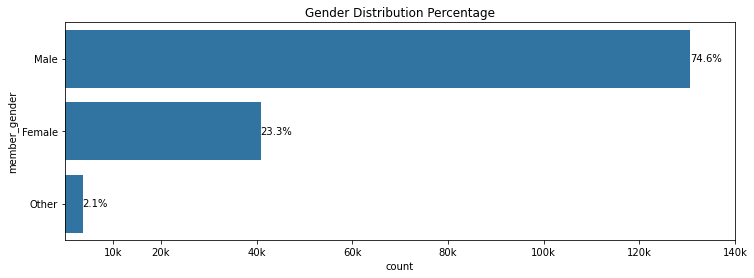

In [11]:
# Print the text (proportion) on the bars

# Get the unique values of the `member_gender` column, in the decreasing order of the frequency.
member_gender_counts = df.member_gender.value_counts()

# Returns the sum of all not-null values in `member_gender` column
n_df = df.member_gender.value_counts().sum()

mem_color = sns.color_palette()[0]
mem_order = df.member_gender.value_counts().index
sns.countplot(data = df, y = 'member_gender', color = mem_color, order = mem_order);

for i in range (member_gender_counts.shape[0]):
    count = member_gender_counts[i]
    # Convert count into a percentage, and then into string
    pct_string = '{:0.1f}%'.format(100 * count / n_df)
    plt.text(count+1, i, pct_string, va = 'center')
    plt.title('Gender Distribution Percentage')
    plt.xlim([0, 14e4])
    plt.xticks([1e4, 2e4, 4e4, 6e4, 8e4, 10e4, 12e4, 14e4], ['10k', '20k', '40k', '60k', '80k', '100k', '120k', '140k'])
    rcParams['figure.figsize'] = 12,4

## Distribution of Ride Demand within the Week

> The demand for a ride is most important on weekdays than it is at weekend. Actually, it is as twice as on Saturdays and Sundays.

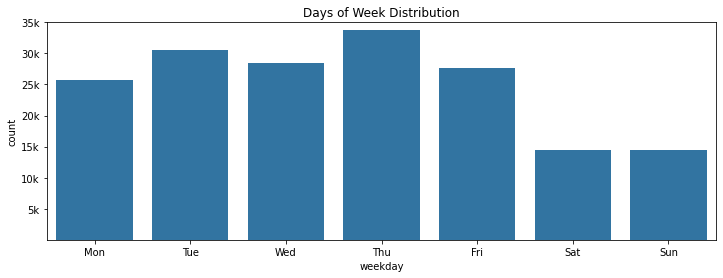

In [12]:
# Plotting the weekly ride demand
weekday = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']    
mem_color = sns.color_palette()[0]
sns.countplot(data = df, x = 'weekday', color = mem_color, order = weekday);
plt.title('Days of Week Distribution');
plt.ylim([0, 35e3])
plt.yticks([5e3, 10e3, 15e3, 20e3, 25e3, 30e3, 35e3], ['5k', '10k', '15k', '20k', '25k', '30k', '35k']);


## Start Ride Time Distribution

> The distribution of start time values appears to be bimodal and spread out more or less evenly, seeming to indicate that there are two separate start time in a day.
The first is morning time and the second is late afternoon The first start time pick period is from 07 AM to 09 AM
The second start time pick period is from 4 PM TO 6 PM, suggesting that these are rush hours when people commute to work and come back from.

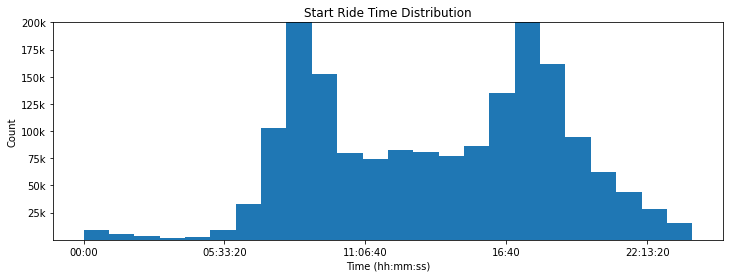

In [13]:
# Plotting start time for each ride
bins = np.arange(0, df.member_birth_year.max()+1, 24)

# Defining a histogram function 
def hist_func(column_name, title, bins_num, x_label, y_label):
    """Plot a histogram.
    
        This function when called, shows a specific variable distribution
        plotted in a histogram, along with its data encodings and formatting
    """
    plt.hist(data = df, x = column_name, bins = bins_num);
    plt.xlabel(x_label);
    plt.ylabel(y_label);
    plt.title(title);
    
hist_func('start_ride_time', 'Start Ride Time Distribution', 24, 'Time (hh:mm:ss)', 'Count') # Calling the function

plt.ylim([0, 20e3])
plt.yticks([25e2, 50e2, 75e2, 100e2, 125e2, 150e2, 175e2, 200e2], ['25k', '50k', '75k', '100k', '125k', '150k', '175k',
                                                                   '200k']);

## Start Ride Time Distribution

> The hsitogram top is concentrated between the year 1980 and 2000. More precisely, most of the people represented by  the distribution are born between 1981 and 1996, so they belong to Gen Y (26 to 41 years old) more commonly known as Millennials

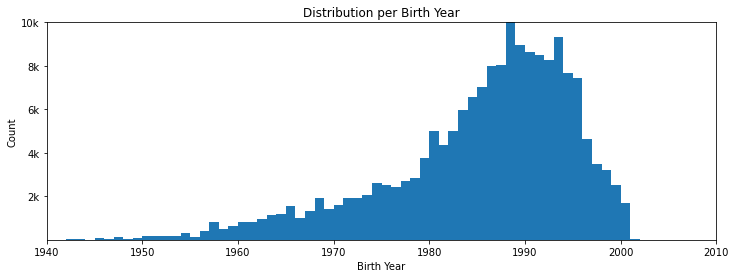

In [14]:
bins = np.arange(1875, df.member_birth_year.max()+5, 1)
hist_func('member_birth_year', 'Distribution per Birth Year', bins, 'Birth Year', 'Count') # Calling the function   
plt.xlim(1940, 2010);
plt.ylim([0, 10e3])
plt.yticks([2e3, 4e3, 6e3, 8e3, 10e3], ['2k', '4k', '6k', '8k', '10k']);

## Ride Duration vs Birth Year
>  Here the amp shows that the top age group fall in a line where bike ride last less. The more they use bike, the less they spend time riding.

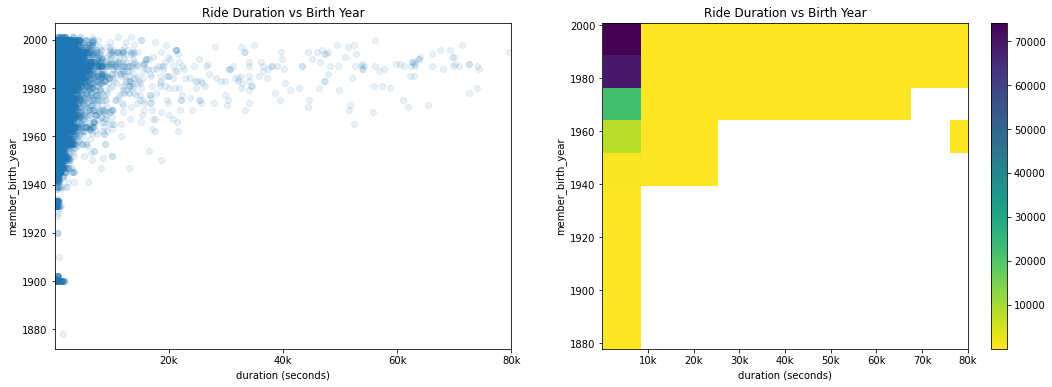

In [15]:

plt.figure(figsize = [18, 6])

# Plot on the left
plt.subplot(1, 2, 1)
sns.regplot(data = df, x = 'duration_sec', y = 'member_birth_year', x_jitter = 0.04, scatter_kws = {'alpha':1/10},
            fit_reg = False)
plt.xlabel('duration (seconds)')
plt.ylabel('member_birth_year');
plt.title('Ride Duration vs Birth Year');
plt.xlim([0, 8e4])
plt.xticks([2e4, 4e4, 6e4, 8e4], ['20k', '40k', '60k', '80k']);

# Plot on the right
plt.subplot(1, 2, 2)

# Specify bin edges 
bins_y = np.arange(61, 84548)
bins_x = np.arange(1878, 2001)

plt.hist2d(data = df, x = 'duration_sec', y = 'member_birth_year',  cmin = 0.5, cmap = 'viridis_r')
plt.colorbar()
plt.xlabel('duration (seconds)')
plt.ylabel('member_birth_year');
plt.title('Ride Duration vs Birth Year');
plt.xlim([0, 8e4])
plt.xticks([1e4, 2e4, 3e4, 4e4, 5e4, 6e4, 7e4, 8e4], ['10k', '20k', '30k', '40k', '50k', '60k', '70k', '80k']);

## Days Distribution per User Type

> Saturdays and Sundays gender have the closest ratio between Customer and Subscriber. Customer rides seem to be consistent across the entire week, whereas Subscriber rides present a kind of fluctuation from Monday to Friday, which makes any observation trickier on weekdays. Even if they seem to ride most on Thursday and on Tuesday.

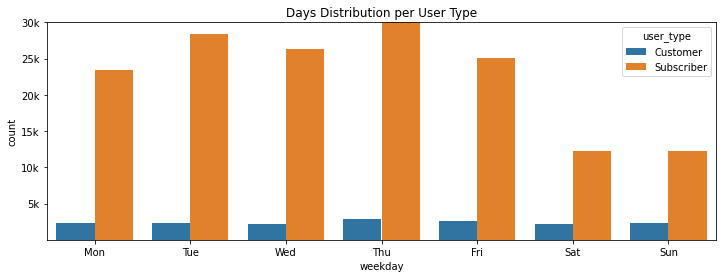

<Figure size 864x576 with 0 Axes>

In [16]:
days_list = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
#order = df.weekday.value_counts().index
sns.countplot(data = df, x = 'weekday', hue = 'user_type', order = days_list);
plt.title('Days Distribution per User Type')
plt.ylim([0, 3e4])
plt.yticks([5e3, 10e3, 15e3, 20e3, 25e3, 30e3], ['5k', '10k', '15k', '20k', '25k', '30k']);
plt.figure(figsize = [12, 8]);

## Gender vs Birth Year

> Displaying Gender vs Birth Year on these violin and box plots shows that there is an approximate density of members birth of year for each gender. The female seem to have the higher member birth year close to the year 2000.
Its long tail suggests outliers with the number of birth year isolated.

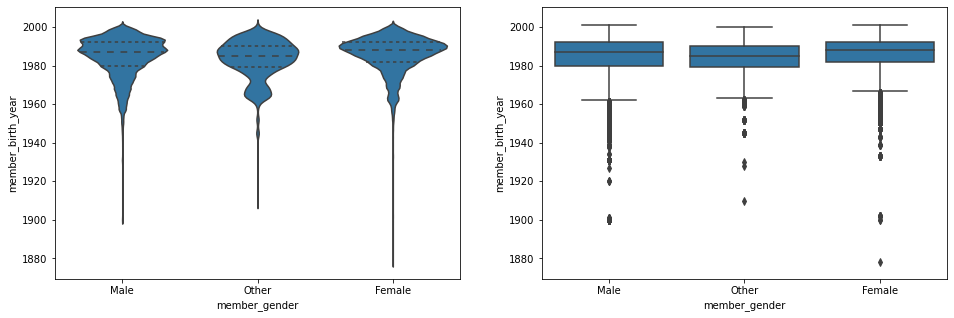

In [17]:
# Display two plots in one figure

plt.figure(figsize = [16, 5])
base_color = sns.color_palette()[0]

# Left plot: violin plot
plt.subplot(1, 2, 1)
#Let's return the axes object
ax1 = sns.violinplot(data = df, x = 'member_gender', y = 'member_birth_year', color = base_color, inner = 'quartile');

# Right plot: box plot
plt.subplot(1, 2, 2)
sns.boxplot(data = df, x = 'member_gender', y = 'member_birth_year', color = base_color);
plt.ylim(ax1.get_ylim()); # set y-axis limits to be same as left plot

## Days and Duration by Gender

> A pick in ride duration is observed on Saturday and Sunday, conveying the idea that people use bike at weekend way longer that on weekdays

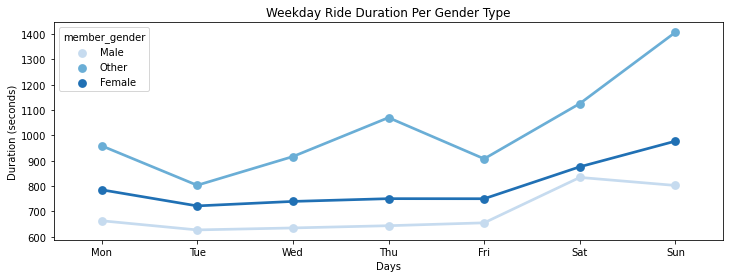

In [18]:
days_list = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'] 
sns.pointplot(data = df, x = 'weekday', y = 'duration_sec', hue = 'member_gender', order = days_list, palette = 'Blues', ci = None)
plt.title('Weekday Ride Duration Per Gender Type')
plt.ylabel('Duration (seconds)')
plt.xlabel('Days')
plt.show()

## Days and Duration by User Type

> Subscriber ride duration seems to be steady from Monday to Friday, but there's a light increase in duration on Friday.
Customer distribution dIdn't seem to be consistent throughout the week. In fact, its mean varied a lot from one day to another, except at the weekend. On top of that, there seems to be an increase on bike demand From Tuesdays to Wednesdays, and from Fridays to Sundays.

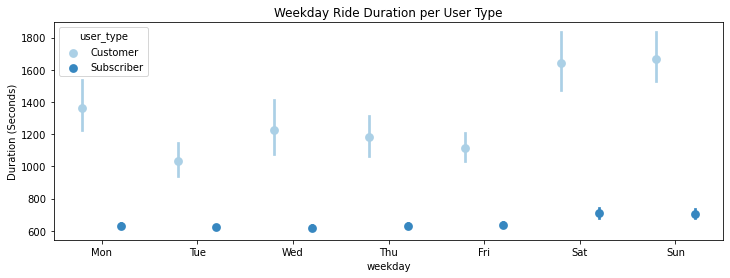

In [19]:

days_list = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']  
ax = sns.pointplot(data = df, x = 'weekday', y = 'duration_sec', hue = 'user_type', palette = 'Blues', linestyles = '',
                   dodge = 0.4, order = days_list)
plt.title('Weekday Ride Duration per User Type')
plt.ylabel('Duration (Seconds)')
ax.set_yticklabels([],minor = True)
plt.show();

### Generate Slideshow
Once you're ready to generate your slideshow, use the `jupyter nbconvert` command to generate the HTML slide show.  

In [ ]:
# Use this command if you are running this file in local
!jupyter nbconvert Part_II_Explanation.ipynb --to slides --post serve --no-input --no-prompt